In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import re
path="/content/drive/MyDrive/CS505/finalProj/cornell_cleaned_new.txt"

In [ ]:
sentences = ""
with open(path, 'r') as f:
  for x in f:
    sentences+=x

sent_ls=sentences.split('===')

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
# return part-of-speech for each word in input sentence 
def getPOS(sent):
    sent = re.sub(r'\n', ' ', sent)
    sent = re.sub('[QA]:+', ' ', sent)
    print(sent)
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent) 
    return sent

In [ ]:
!pip install svgling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 2.6 MB/s 


In [ ]:
# chunking based on the pattern
def chunking(sent, pattern):
  cp = nltk.RegexpParser(pattern)
  cs = cp.parse(sent)
  return cs

In [ ]:
sent = getPOS(sent_ls[0])
pattern = 'NP: {<DT>?<JJ>*<NN>}'
cs = chunking(sent,pattern)

  Not the hacking and gagging and spitting part . Please .   Okay ... then how 'bout we try out some French cuisine . Saturday ? Night ? 


In [ ]:
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint
# iob_tagged = tree2conlltags(cs)
# pprint(iob_tagged)

# nltk.download('maxent_ne_chunker')
# nltk.download('words')
ne_tree = nltk.ne_chunk(pos_tag(word_tokenize('Mary is going to Paris on sep 6 at 2pm from Boston Logan Airport')))
print(tree2conlltags(ne_tree))

[('Mary', 'NNP', 'O'), ('is', 'VBZ', 'O'), ('going', 'VBG', 'O'), ('to', 'TO', 'O'), ('Paris', 'NNP', 'B-GPE'), ('on', 'IN', 'O'), ('sep', 'NN', 'O'), ('6', 'CD', 'O'), ('at', 'IN', 'O'), ('2pm', 'CD', 'O'), ('from', 'IN', 'O'), ('Boston', 'NNP', 'B-GPE'), ('Logan', 'NNP', 'O'), ('Airport', 'NNP', 'O')]


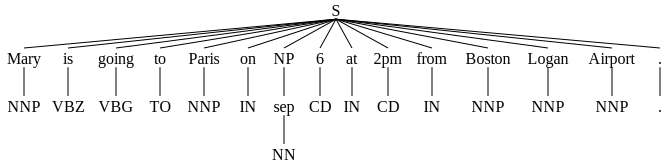

In [ ]:
s = 'Mary is going to Paris on sep 6 at 2pm from Boston Logan Airport.'
t = word_tokenize(s)
p = pos_tag(t)
chunking(p, pattern)
# nltk.ne_chunk(pos_tag(word_tokenize(s)))

In [ ]:
for s in sent_ls:
  sent = getPOS(s)
  # pattern for chunking:
  # a noun(NP) should be formed whenever the chunker finds an optional 
  # determiner(DT) followed by any number of adjectives(JJ) and then a noun(NN)
  pattern = 'NP: {<DT>?<JJ>*<NN>}'


Find NER with spacy

In [ ]:
import spacy
from spacy import displacy
from collections import Counter
!python -m spacy download en_core_web_lg
# import en_core_web_lg
# nlp = en_core_web_sm.load()
nlp = spacy.load('en_core_web_lg')

In [ ]:
import re
# remove /n and Q: A:
# str -> str
def process(sent):
  sent = re.sub(r'\n', ' ', sent)
  sent = re.sub('[QA]:+', ' ', sent)
  return sent

output_ls=[]
for i, sent in enumerate(sent_ls):
  s = process(sent)
  doc = nlp(s)
  output_ls += [(X.text, X.label_, i) for X in doc.ents]


In [ ]:
output_ls[0]

('French', 'NORP', 0)

In [ ]:
import csv
folderpath="/content/drive/MyDrive/CS505/finalProj/"
with open(folderpath+'ner_spacy_lg.csv', 'w') as f:
  write=csv.writer(f)
  write.writerows(output_ls)

In [ ]:
!head /content/drive/MyDrive/CS505/finalProj/ner_spacy.csv

French,NORP,0
Saturday,DATE,0
Cameron,ORG,1
one,CARDINAL,5
twenty minutes,TIME,6
two,CARDINAL,6
Kat,PERSON,7
Gigglepuss,PRODUCT,9
Club Skunk,ORG,9
Shakespeare,PERSON,10


Find NER with nltk

In [ ]:
def ner_nltk(sentence, i):
  out=[]
  for sent in nltk.sent_tokenize(sentence):
    for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
      if hasattr(chunk, 'label'):
          out.append((' '.join(c[0] for c in chunk), chunk.label(), i))
  return out

In [ ]:
output_ls_nltk=[]
for i, sent in enumerate(sent_ls):
  s = process(sent)
  output_ls_nltk+=ner_nltk(s,i)

In [ ]:
import csv
with open(folderpath+'ner_nltk.csv', 'w') as f:
  write=csv.writer(f)
  write.writerows(output_ls_nltk)

In [ ]:
!head /content/drive/MyDrive/CS505/finalProj/ner_nltk.csv

Please,GPE,0
Okay,GPE,0
French,GPE,0
Night,GPE,0
Cameron,PERSON,1
Gosh,GPE,2
Wench,ORGANIZATION,3
Pretty,GPE,4
Me,GPE,5
Thank,GPE,5


Bert-based

In [ ]:
!pip install transformers
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")
nlp = pipeline("ner", model=model, tokenizer=tokenizer)

In [ ]:
output = []
for i, sent in enumerate(sent_ls):
  ner_result = nlp(sent)
  for x in ner_result:
    output += (x['word']+','+x['entity']+','+i+'\n')

In [ ]:
print(output[0])
print(output[1])
print(output[2])

French
B-MISC
0
